## Search PatCID with Patent Query

This notebook illustrates how to retrieve molecules referenced in a patent of interest. The schema of the dataset is detailed [here]().

#### 1. Import dependencies

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import ast
import os
import subprocess
import pandas as pd
import mols2grid
from rdkit import Chem
from pdf2image import convert_from_path
from src.display import display_molecules_locations

#### 2. Search patent 

In [2]:
# Define a query patent 
query_patent = "US10526338"
# US: publication number (ex: "US10526338")
# JPO publication number (ex: "JP2022502495")
# CNIPA: publication number (ex: "CN103119160")
# EPO application number (ex: "EP14720074B1") 
# KIPO: application number (ex: "KR1020200102763")

In [3]:
office = "uspto" if (query_patent[:2] == "US") \
    else "jpo" if (query_patent[:2] == "JP") \
    else "cnipa" if (query_patent[:2] == "CN") \
    else "epo" if (query_patent[:2] == "EP") \
    else "kipo" 

patcid_path = os.getcwd() + f"/../data/patcid/patcid_patent_to_molecules_{office}.jsonl"
process = subprocess.Popen([f"/usr/bin/grep -Rnw {patcid_path} -e {query_patent}"], shell = True, stdout=subprocess.PIPE)
try:
    patent_entry, errors = process.communicate(timeout=500)
except subprocess.TimeoutExpired:
    print("Request timeout.")
if (errors != None):
    print("Request error.")
if (patent_entry == b""):
    print(f"{query_patent} not found in PatCID.")
else:
    if len(patent_entry.decode("utf-8").split("\n")[:-1]) > 1:
        identifiers = [ast.literal_eval(":".join(p.split(":")[1:]))["patent"]["identifiers"] for p in patent_entry.decode("utf-8").split("\n")[:-1]]
        print(f"Multiple patent identifiers were matched: {identifiers}. Please re-run the query to make sure to match only one patent (for instance, adding its kindcode).")
    else:
        print(f"{query_patent} found in PatCID.")
        patent_entry = ast.literal_eval(":".join(patent_entry.decode("utf-8").split(":")[1:]))

US10526338 found in PatCID.


#### 3. Display molecules found in patent

In [4]:
smiles_list = [figure["smiles"]["value"] for figure in patent_entry["figures"] if "smiles" in figure]
df = pd.DataFrame(smiles_list, columns=["SMILES"])
print(df)

                                               SMILES
0   CC(C)(C1=CC=CC=N1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(...
1   CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(...
2   CC1=CC=C(S(=O)(=O)N2C=C(B3OC(C)(C)C(C)(C)O3)C3...
3   CCOC(=O)CC(NC1=C(F)C=NC(Cl)=N1)C(C)(C)C1=NC=CC=C1
4   CCOC(=O)CC(NC1=NC(C2=CN(S(=O)(=O)C3=CC=C(C)C=C...
..                                                ...
78  CC(C)(C1=NC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2...
79  C=CCC(C)(C)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3...
80  CC(C)(C1=CC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2...
81  COC(C)(C)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C...
82  CN1C=CC(C(C)(C)C(CC(=O)O)NC2=C(F)C=C(C#N)C(C3=...

[83 rows x 1 columns]


In [5]:
# Display molecules
mols2grid.display(df, smiles_col="SMILES") 

MolGridWidget()

In [6]:
# Save SMILES
pd.DataFrame({"smiles": smiles_list}).to_csv(f"smiles_{query_patent}.csv")

#### 4. Display molecules locations

Patent PDF documents can be downloaded from the patent offices websites: [USPTO](https://ppubs.uspto.gov/pubwebapp/static/pages/ppubsbasic.html), [JPO](https://www.j-platpat.inpit.go.jp/p0000), [CNIPA](https://pss-system.cponline.cnipa.gov.cn/conventionalSearchEn), [EPO](https://worldwide.espacenet.com/singleLineSearch?locale=en_EP), [KIPO](http://engpat.kipris.or.kr/engpat/searchLogina.do?next=MainSearch#page1).

The downloaded documents should then be placed in `./data/pdfs/`.

Molecules in page 1
Molecules in page 2


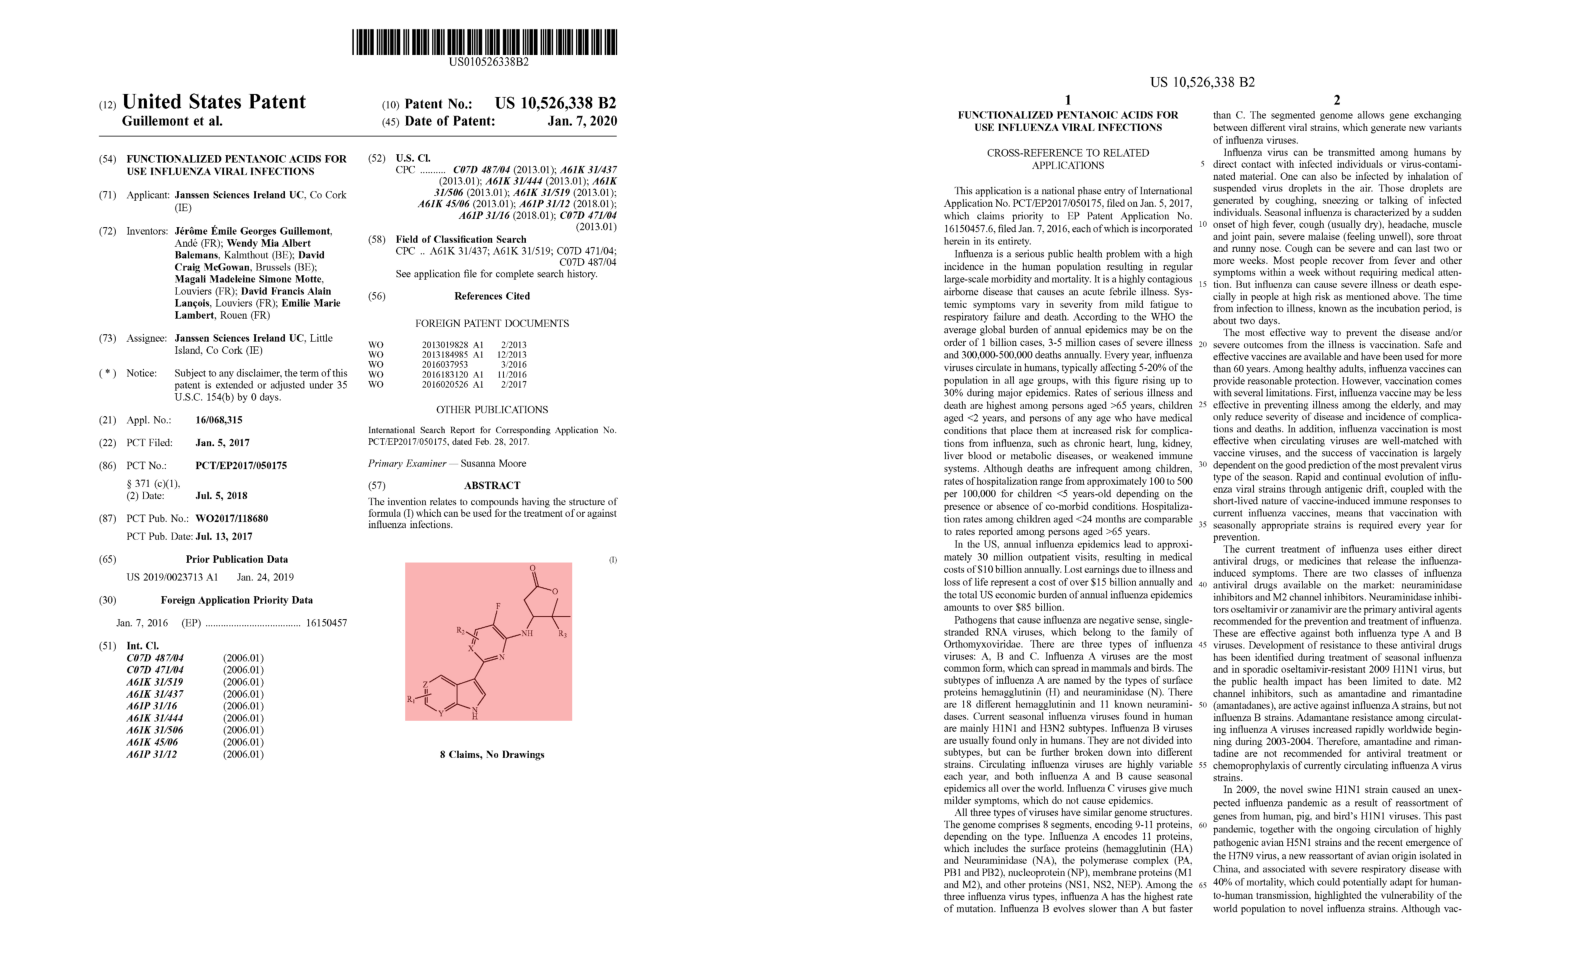

Molecules in page 3
0: CC(C)(C1=CC=CC=N1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=NC=C(Cl)C=C23)=N1
1: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
Molecules in page 4


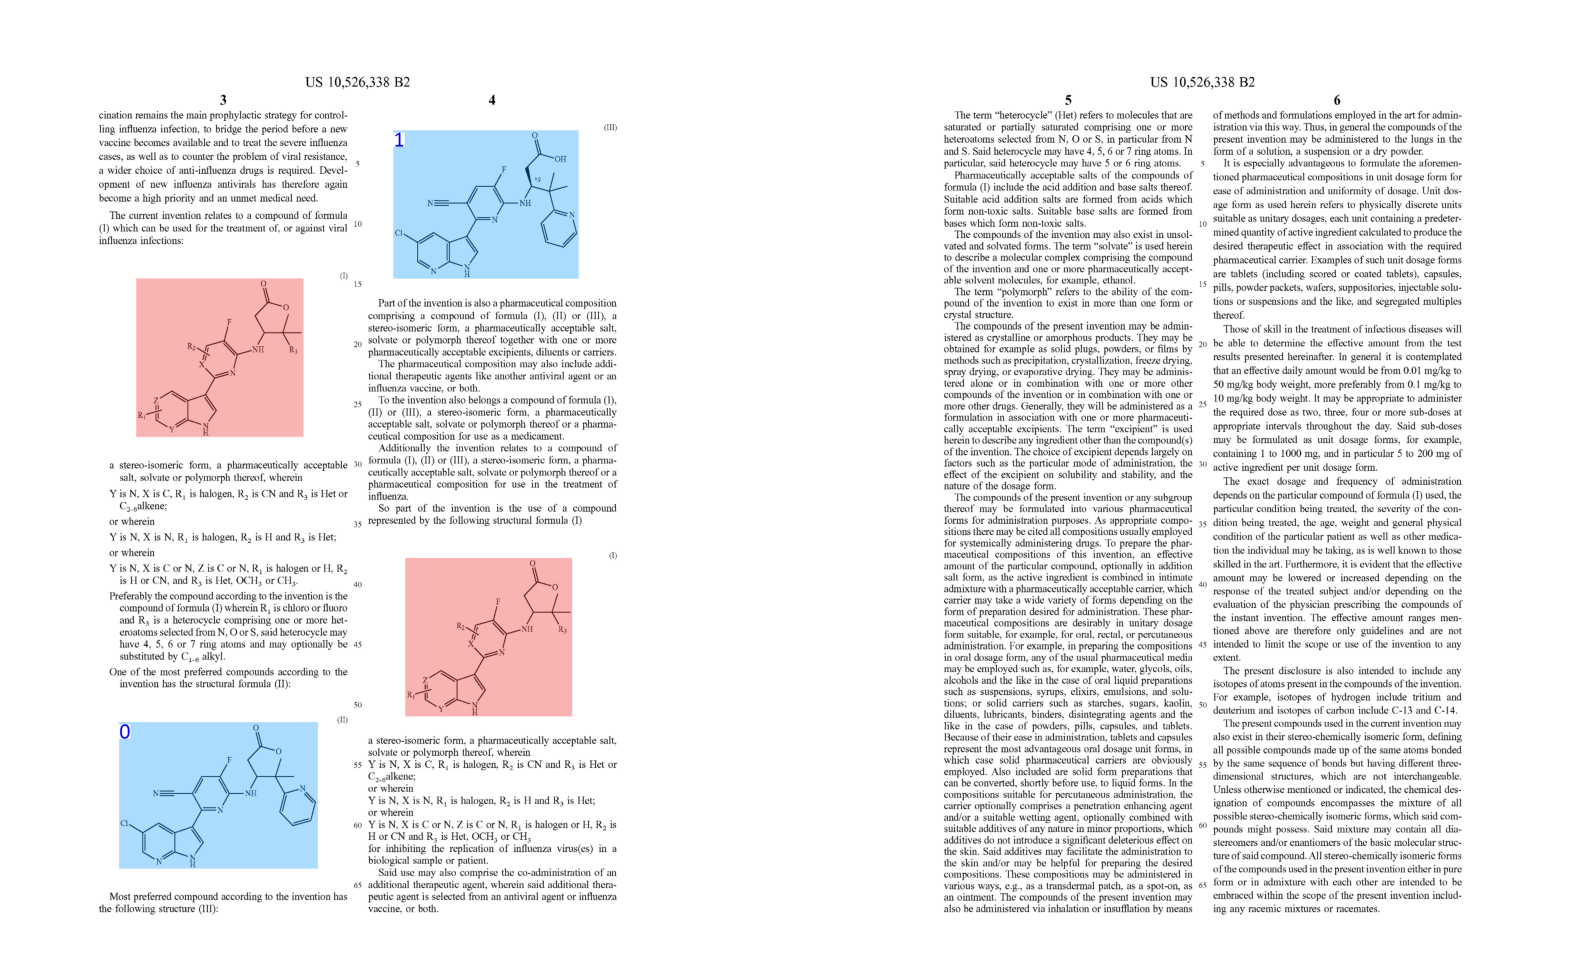

Molecules in page 5
2: CC1=CC=C(S(=O)(=O)N2C=C(B3OC(C)(C)C(C)(C)O3)C3=C2N=CN=C3)C=C1
3: CCOC(=O)CC(NC1=C(F)C=NC(Cl)=N1)C(C)(C)C1=NC=CC=C1
4: CCOC(=O)CC(NC1=NC(C2=CN(S(=O)(=O)C3=CC=C(C)C=C3)C3=C2C=NC=N3)=NC=C1F)C(C)(C)C1=NC=CC=C1
5: CCOC(=O)CC(N)C(C)(C)C1=NC=CC=C1
6: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=NC(C2=CNC3=C2C=NC=N3)=NC=C1F
7: CCOC(=O)CBr
8: CC(C)(C#N)C1=NC=CC=C1
9: CCOC(=O)C=C(N)C(C)(C)C1=NC=CC=C1
10: FC1=C(Cl)N=C(Cl)N=C1
Molecules in page 6
11: CCOC(=O)CC(N(O)CC1=CC=CC=C1)C1(C)COC1
12: CCOC(=O)CC(N)C1(C)COC1
13: [H]N(C1=C(F)C=NC(Cl)=N1)C(CC(=O)OCC)C1(C)COC1


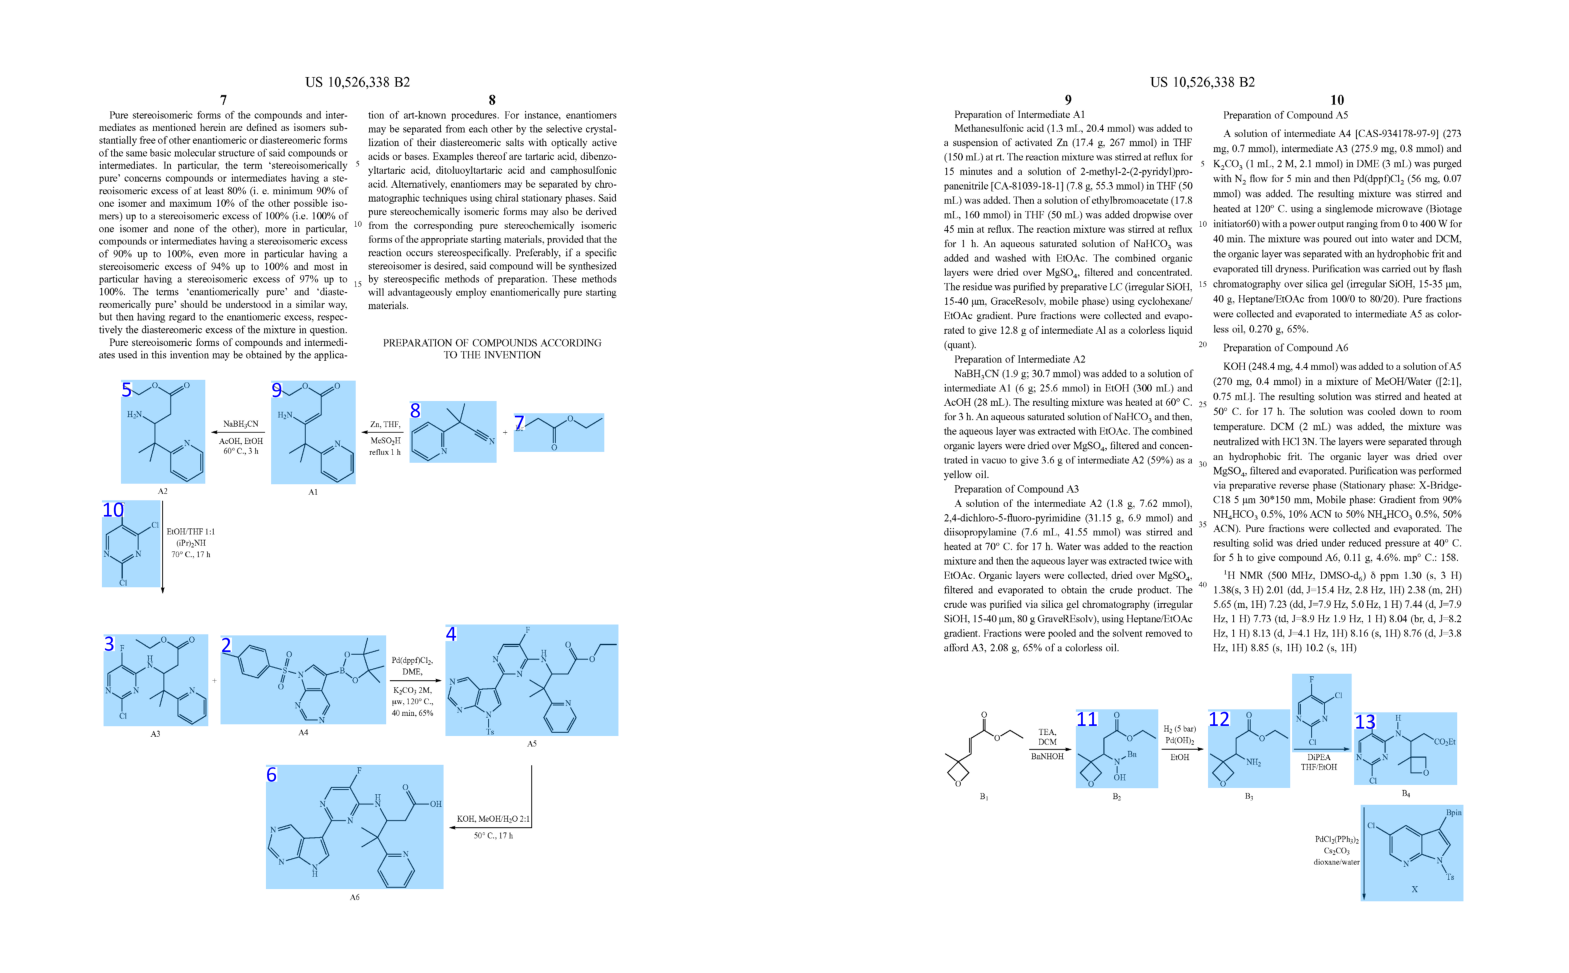

Molecules in page 7
14: [H]N(C1=C(F)C=C(C#N)C(Cl)=N1)C(CC(=O)OCC)C(C)(C)C1=CC=CC=N1
15: CC(C)(C#N)C1=NC=CC=C1
16: N#CC1=CC(F)=C(Cl)N=C1Cl
17: CCOC(=O)CC(N)C(C)(C)C1=NC=CC=C1
18: CCOC(=O)CC(=O)C(C)(C)C1=NC=CC=C1
19: [H]N(C1=C(F)C=NC(C2=CN(I)C3=NC=C(Cl)C=C23)=N1)C(CC(=O)OCC)C1(C)COC1
20: [H]N1C=C(C2=NC(N([H])C(CC(=O)O)C3(C)COC3)=C(F)C=N2)C2=CC(Cl)=CN=C21
Molecules in page 8
21: [H]N1C=C(C2=NC(N([H])C(CC(=O)O)C(C)(C)C3=CC=CC=N3)=C(F)C=C2C#N)C2=CC(Cl)=CN=C21
22: [H]N(C1=C(F)C=C(C#N)C(C2=CN(S(=O)(=O)C3=CC=C(C)C=C3)C3=NC=C(Cl)C=C23)=N1)C(CC(=O)OCC)C(C)(C)C1=CC=CC=N1


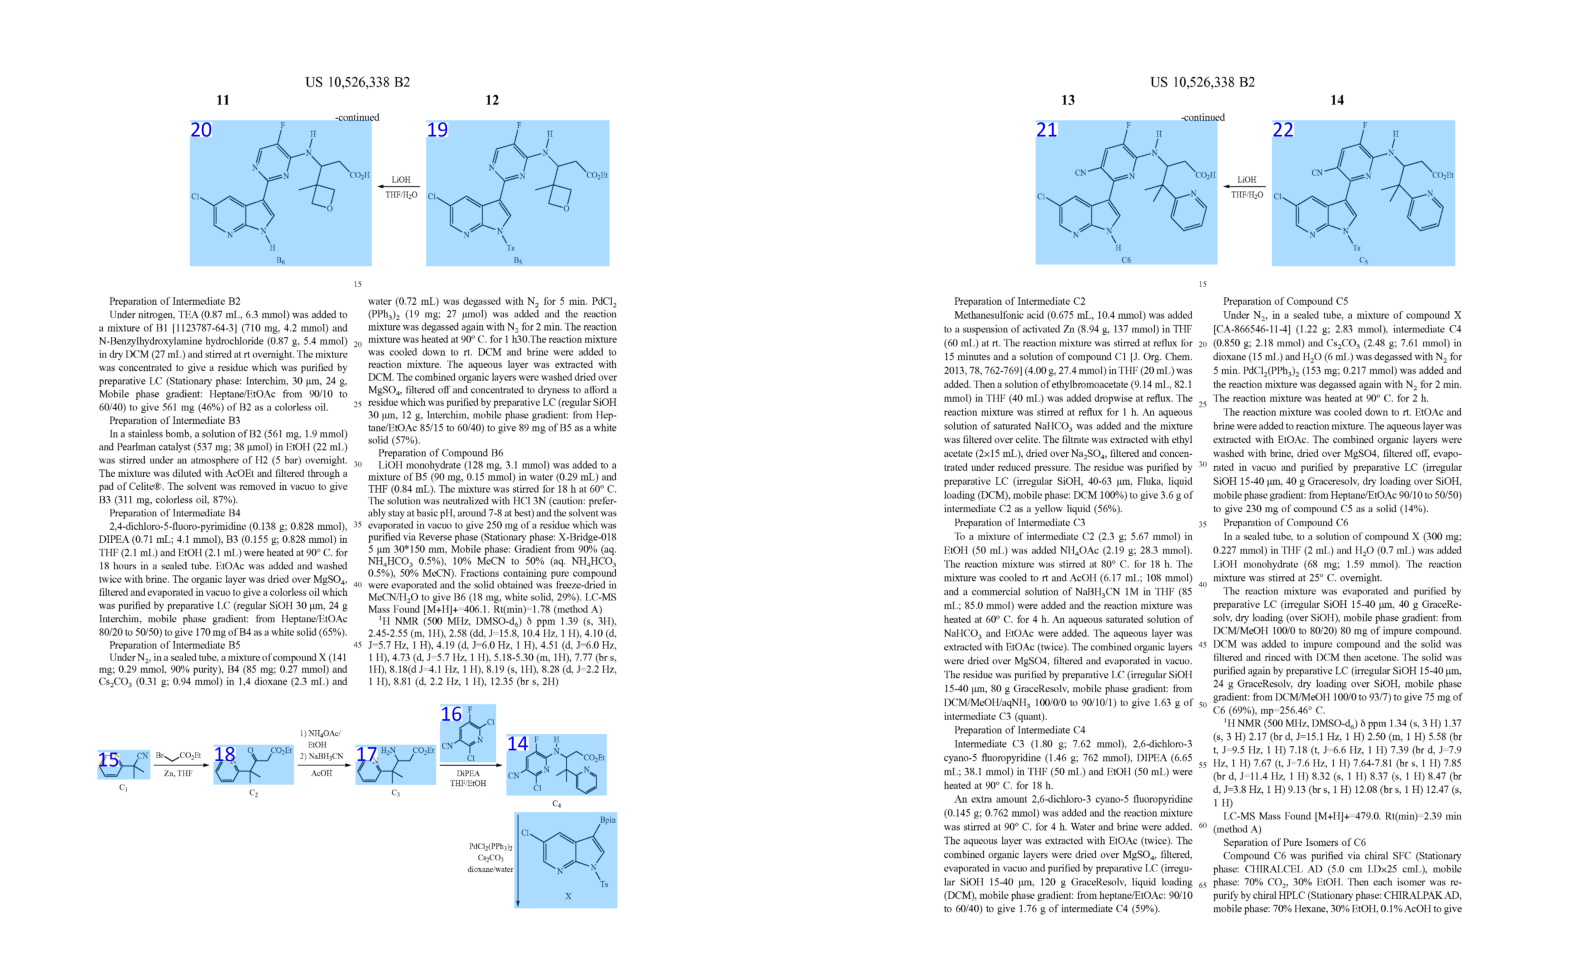

Molecules in page 9
23: CCOC(=O)C=C(N)C(C)(C)C1=CC=CS1
24: CCOC(=O)CC(N)C(C)(C)C1=CC=CS1
25: CC(C)(C#N)C1=CC=CS1
26: CC(C)(C1=CC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
27: CCOC(=O)CC(NC1=C(F)C=C(C#N)C(Cl)=N1)C(C)(C)C1=CC=CS1
Molecules in page 10
28: CCOC(=O)CC(N)C(C)(C)C1=NN(C)C=C1
29: CCOC(=O)CC(NC1=C(F)C=C(C#N)C(Cl)=N1)C(C)(C)C1=NN(C)C=C1
30: CCOC(=O)C=C(N)C(C)(C)C1=NN(C)C=C1
31: CN1C=CC(CC#N)=N1
32: CN1C=CC(C(C)(C)C(CC(=O)O)NC2=C(F)C=C(C#N)C(C3=CNC4=NC=C(Cl)C=C34)=N2)=N1
33: CN1C=CC(C(C)(C)C#N)=N1


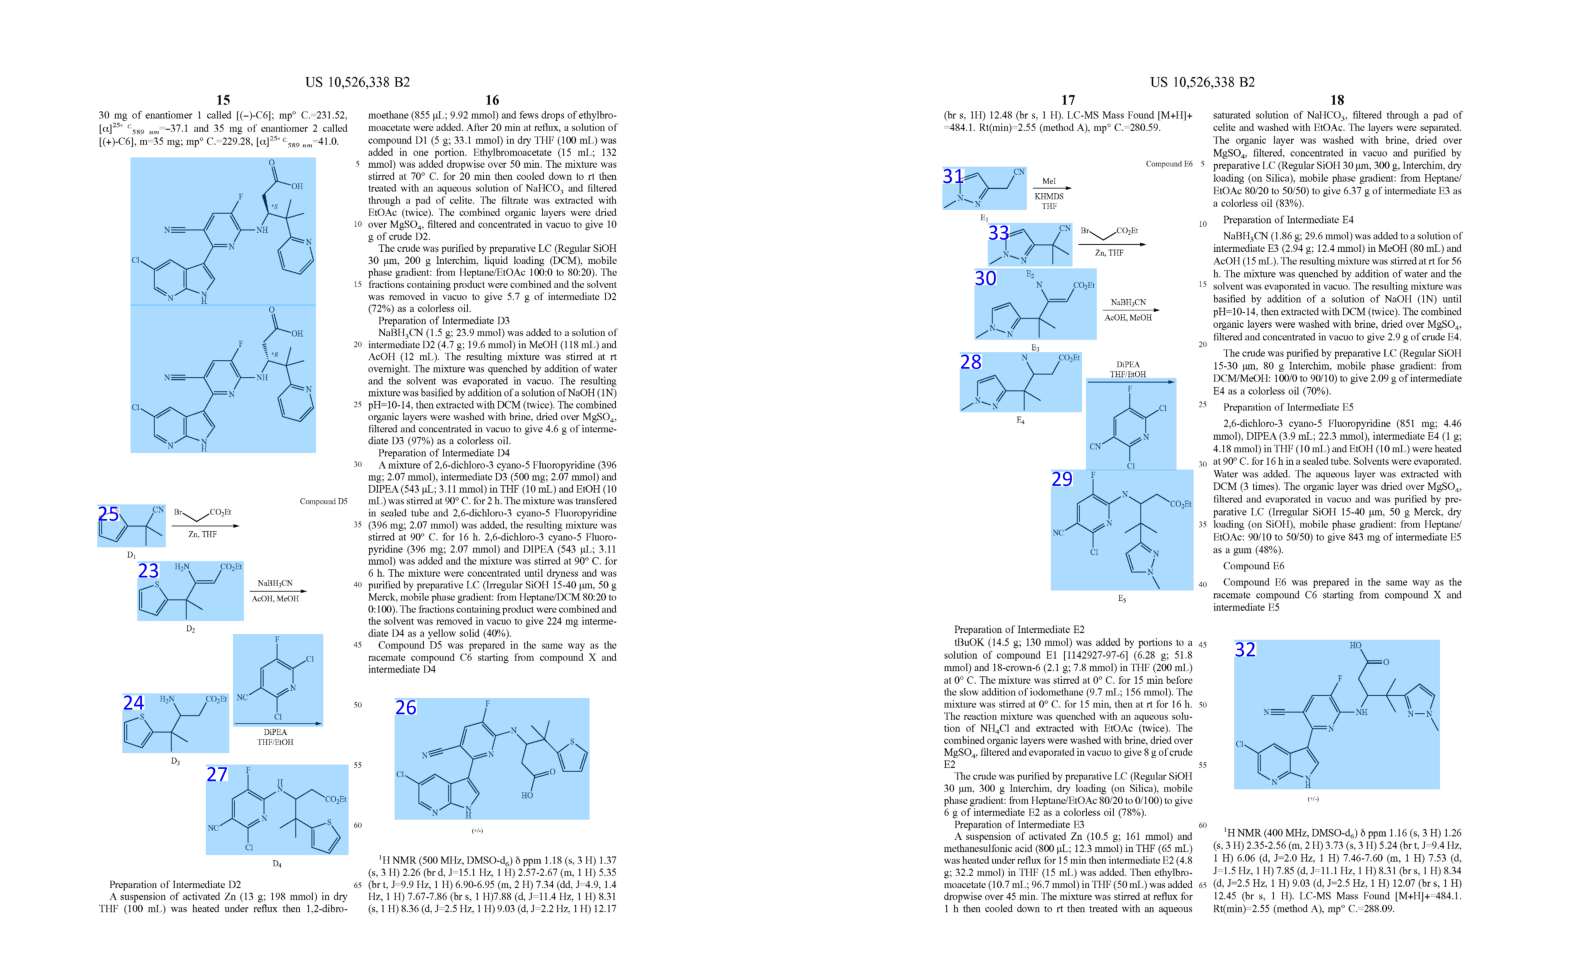

Molecules in page 11
34: C=CCC(C)(C)C(N)CC(=O)OCC
35: C=CCC(C)(C)C(CC(=O)OCC)NC1=C(F)C=C(C#N)C(Cl)=N1
36: C=CCC(C)(C)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=NC=C(Cl)C=C23)=N1
37: CCOC(=O)C=C(N)C(C)(C)C1=NC=CS1
38: N#CCC1=NC=CS1
39: CC(C)(C#N)C1=NC=CS1
40: C=CCC(C)(C)C(N)CC(=O)OC
41: C=CCC(C)(C)C(CC(=O)OC)NC1=C(F)C=C(C#N)C(Cl)=N1
42: CCCBr
Molecules in page 12
43: CCOC(=O)CC(NC1=C(F)C=NC(Cl)=N1)C(C)(C)C1=CC=CS1
44: CCOC(=O)CC(N)C(C)(C)C1=NC=CS1
45: CC(C)(C1=NC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=NC=C(Cl)C=C23)=N1
46: CCOC(=O)CC(NC1=C(F)C=C(C#N)C(Cl)=N1)C(C)(C)C1=NC=CS1
47: CCOC(=O)CC(N)C(C)(C)C1=CC=CS1
48: N#CC1=CC(F)=C(Cl)N=C1Cl


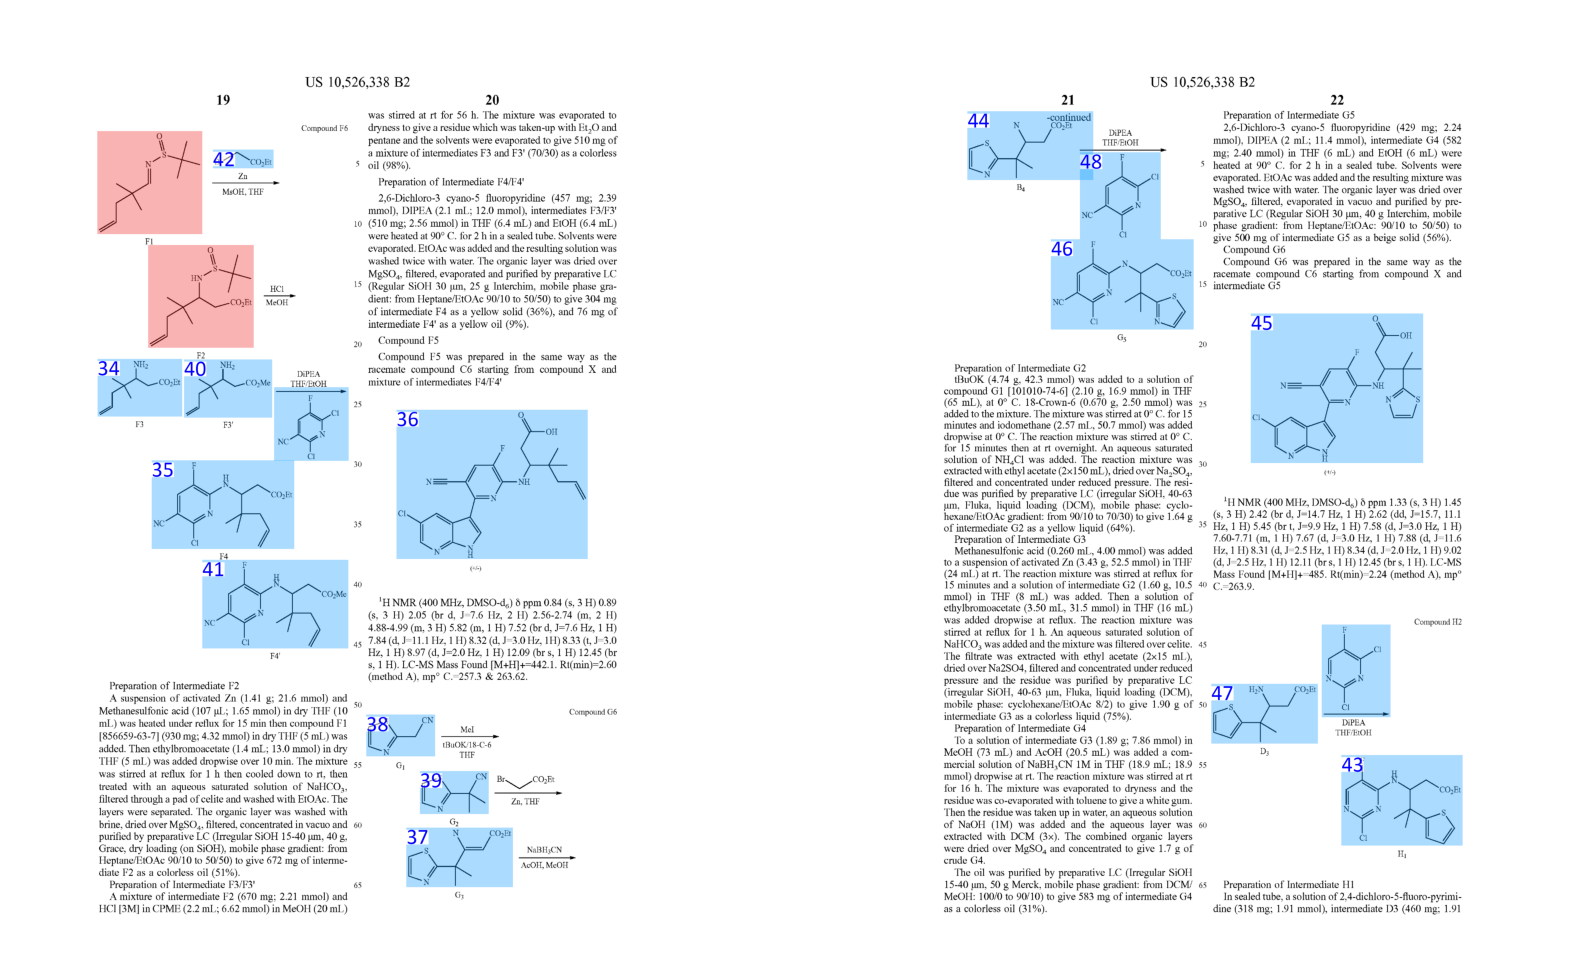

Molecules in page 13
49: N#CC1=CC(F)=C(Cl)N=C1Cl
50: [H]N(C1=C(F)C=C(C#N)C(Cl)=N1)C(CC(=O)OCC)C(C)(C)OC
51: CCOC(=O)CC(N)C(C)(C)OC
52: CC(C)(C1=CC=CS1)C(CC(=O)O)NC1=C(F)C=NC(C2=CNC3=NC=C(Cl)C=C23)=N1
53: [H]N1C=C(C2=NC(N([H])C(CC(=O)O)C(C)(C)OC)=C(F)C=C2C#N)C2=CC(Cl)=CN=C21
54: [H]N(C1=C(F)C=C(C#N)C(C2=CN(S(=O)(=O)C3=CC=C(C)C=C3)C3=NC=C(Cl)C=C23)=N1)C(CC(=O)OCC)C(C)(C)OC
Molecules in page 14
55: N#CC1=CC(F)=C(Cl)N=C1Cl
56: [H]N1C=C(C2=NC(N([H])C(CC(=O)O)C(C)(C)C)=C(F)C=C2C#N)C2=CC(Cl)=CN=C21
57: CCOC(=O)CC(N)C(C)(C)C
58: [H]N(C1=C(F)C=C(C#N)C(C2=CN(S(=O)(=O)C3=CC=C(C)C=C3)C3=NC=C(Cl)C=C23)=N1)C(CC(=O)OCC)C(C)(C)C
59: [H]N(C1=C(F)C=C(C#N)C(Cl)=N1)C(CC(=O)OCC)C(C)(C)OC


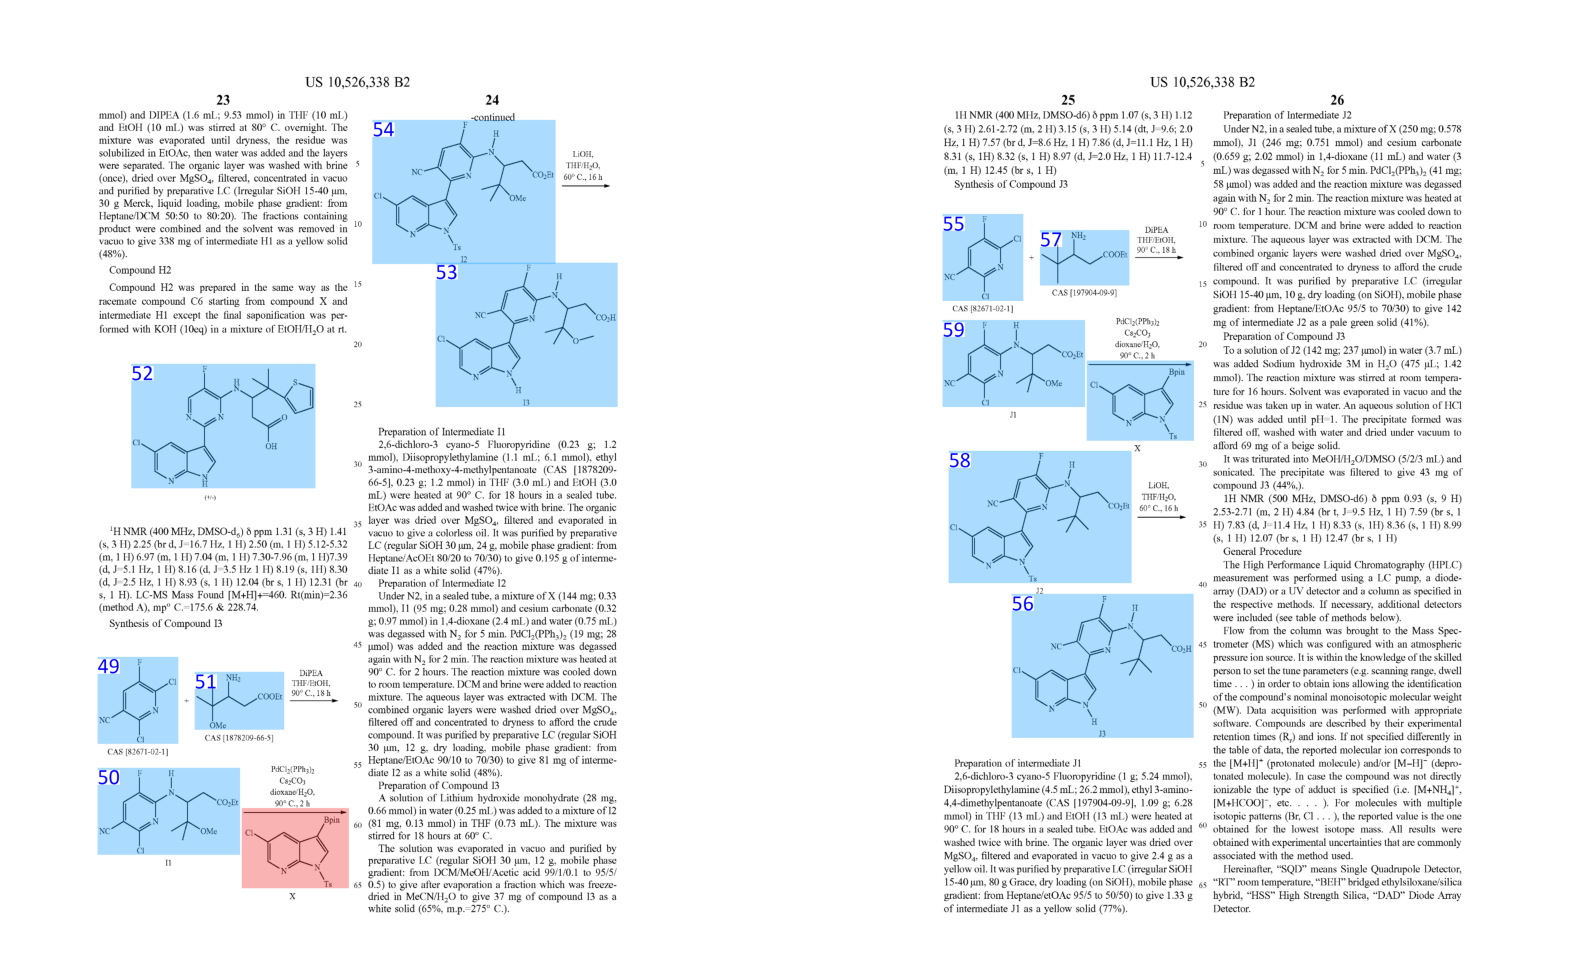

Molecules in page 15
60: CC(C)(C1=NC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=NC=C(Cl)C=C23)=N1
61: CC(C)(C1=CC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
62: CC(C)(C1=CC=CS1)C(CC(=O)O)NC1=C(F)C=NC(C2=CNC3=NC=C(Cl)C=C23)=N1
Molecules in page 16
63: CC1(C(CC(=O)O)NC2=C(F)C=NC(C3=CNC4=NC=C(Cl)C=C34)=N2)COC1
64: CN1C=CC(C(C)(C)C(CC(=O)O)NC2=C(F)C=C(C#N)C(C3=CNC4=NC=C(Cl)C=C34)=N2)=N1
65: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
66: C=CCC(C)(C)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=NC=C(Cl)C=C23)=N1
67: CC(C)(C1=CC=CC=N1)C(CC(=O)O)NC1=NC(C2=CNC3=C2C=NC=N3)=NC=C1F


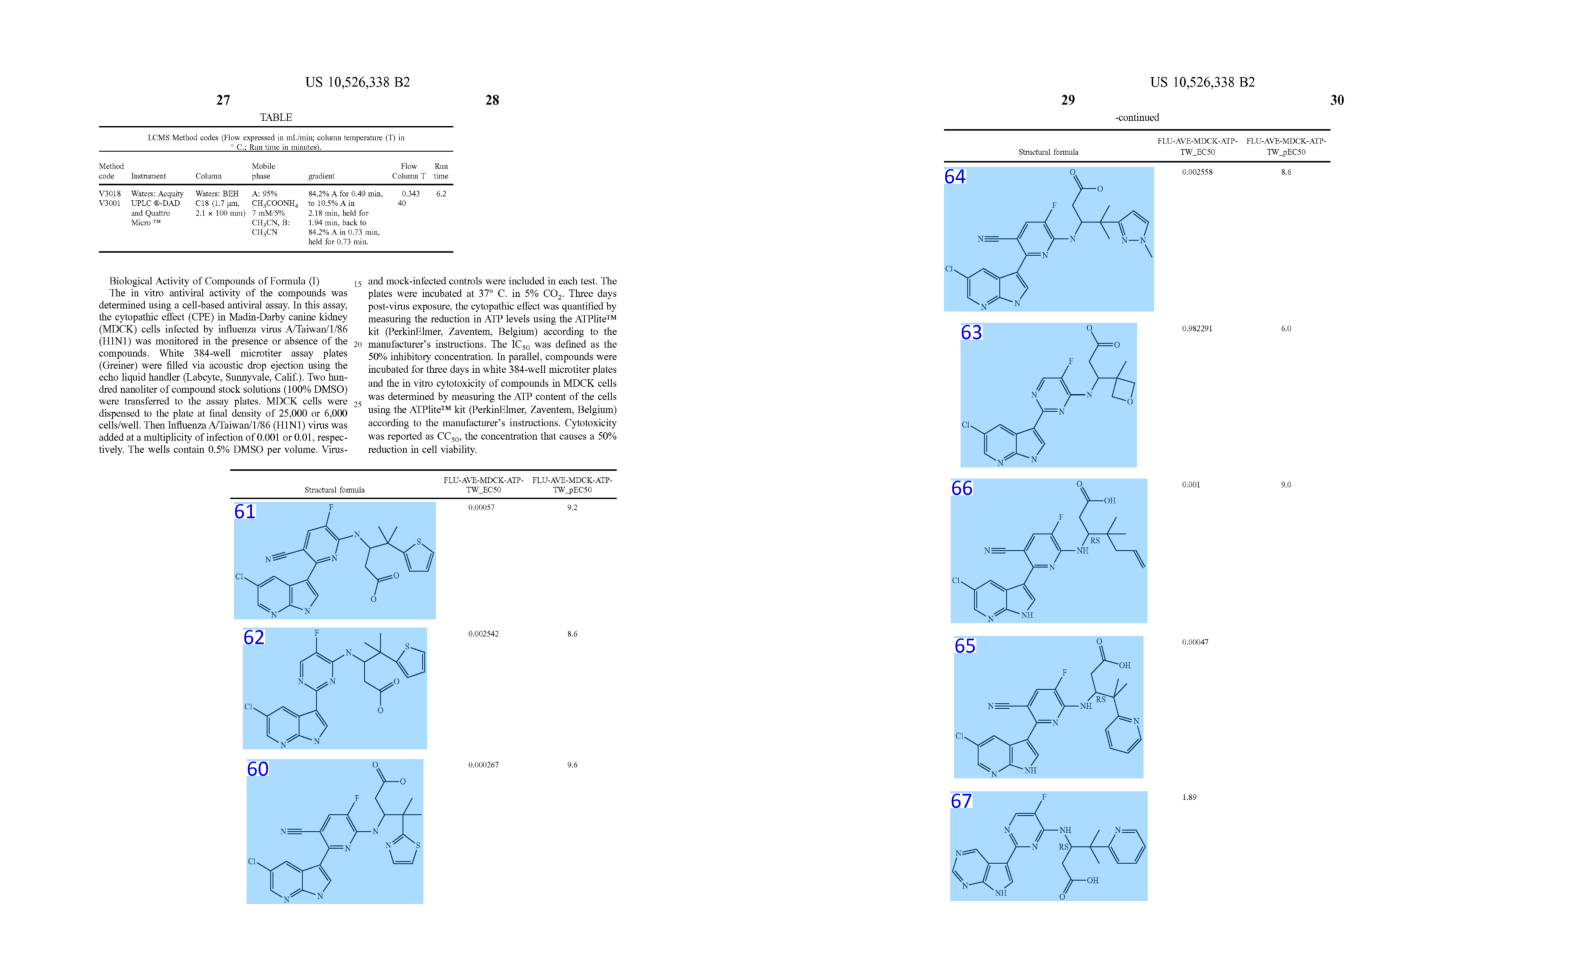

Molecules in page 17
68: CC1(C2=CC=CC=N2)OC(=O)CC1NC1=C(F)C=C(C#N)C(C2=CNC3=NC=C(Cl)C=C23)=N1
69: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
70: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
Molecules in page 18
71: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
72: CC(C)(C1=CC=CS1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
73: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=NC(C2=CNC3=C2C=NC=N3)=N1
74: CC1(C(CC(=O)O)NC2=C(F)C=NC(C3=CNC4=C3C=C(Cl)C=N4)=N2)COC1
75: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1
76: CC(C)(C1=NC=CC=C1)C(CC(=O)O)NC1=C(F)C=C(C#N)C(C2=CNC3=C2C=C(Cl)C=N3)=N1


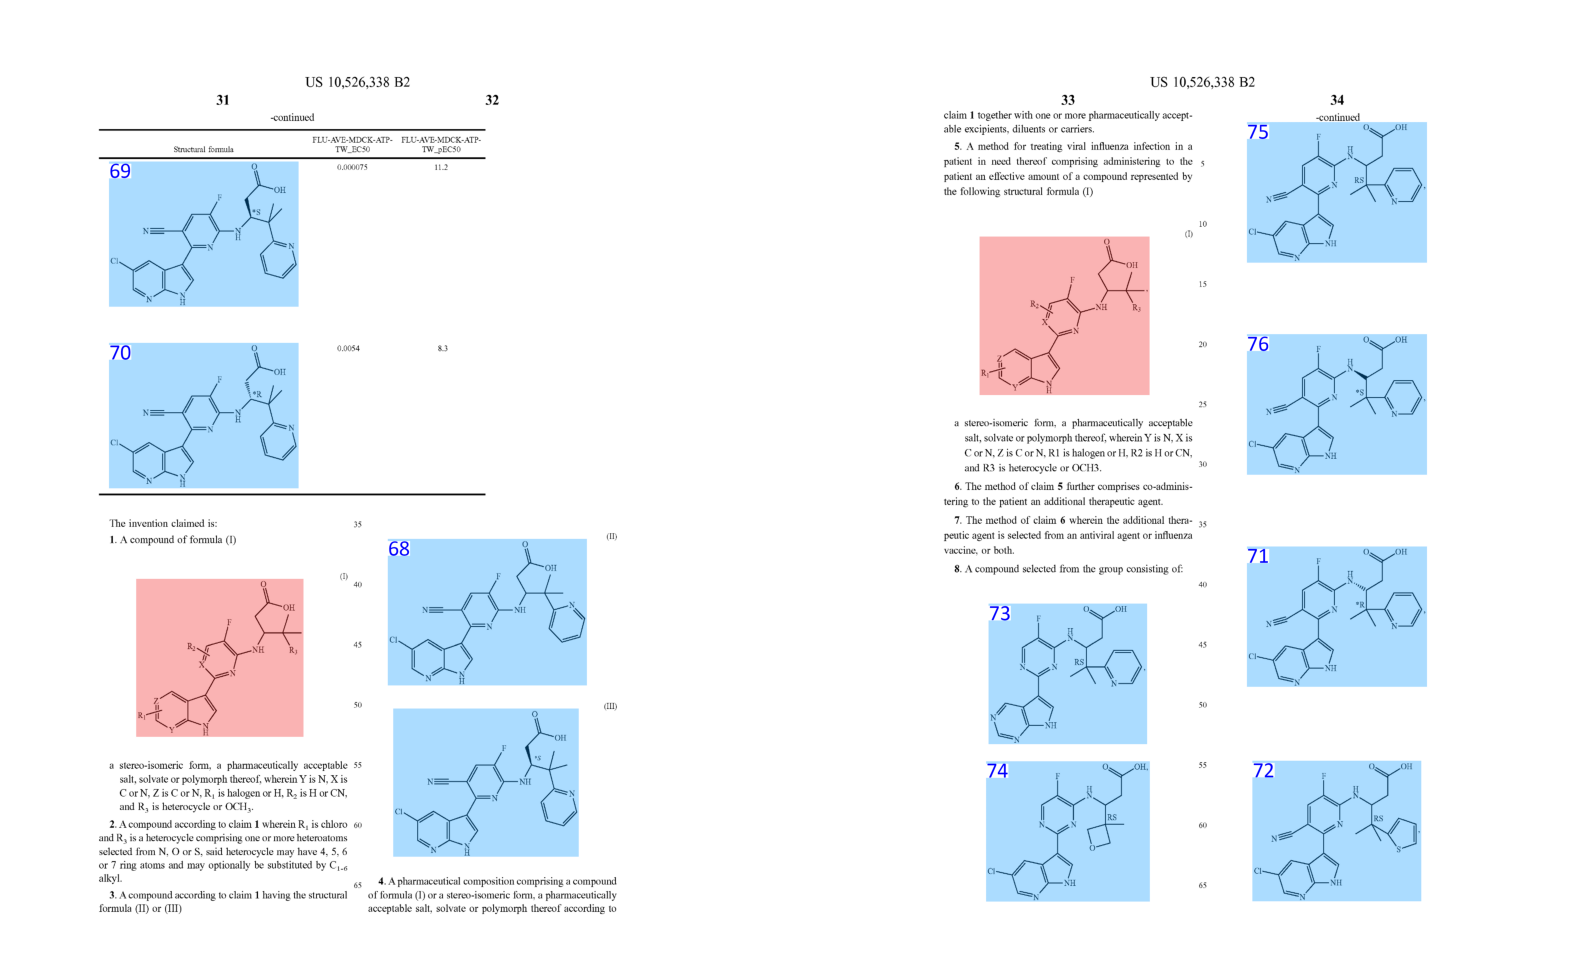

defaultdict(<class 'list'>, {})


In [8]:
if not(os.path.exists(os.getcwd() + f"/../data/pdfs/{query_patent}.pdf")):
    print(os.getcwd() + f"/../data/pdfs/{query_patent}.pdf not found. To display molecules locations, it is first needed to download the document .pdf on the patent office website.")

# Convert pdf to page images
pages = convert_from_path(os.getcwd() + f"/../data/pdfs/{query_patent}.pdf", dpi=200)

# Display pages and molecules (To display more pages, modify max_pages_displayed)
display_molecules_locations(pages, patent_entry, max_pages_per_row=2, max_pages_displayed=20, highlight_smiles_list=[])